# MOD10A1F

In [5]:
from scripts.imports import *
from pyhdf.SD import SD, SDC

filename = '../data_store/data/MOD10A1F_sodankyla/MOD10A1F.A2018283.h19v02.061.2021348163421.hdf'

# hdf = pd.read_hdf(filename, 'r')
# hdf = h5py.File(filename, 'r')
hdf = SD(filename, SDC.READ)
hdf.datasets()

# dataname = 'CGF_NDSI_Snow_Cover'
# data2D = hdf.select(dataname)
# data = data2D[:,:]
# data

# filename = './mod10a1/MOD10A1F.A2018283.h19v02.061.2021348163421.hdf'

{'CGF_NDSI_Snow_Cover': (('YDim:MOD_Grid_Snow_500m',
   'XDim:MOD_Grid_Snow_500m'),
  (2400, 2400),
  21,
  0),
 'Cloud_Persistence': (('YDim:MOD_Grid_Snow_500m', 'XDim:MOD_Grid_Snow_500m'),
  (2400, 2400),
  21,
  1),
 'Basic_QA': (('YDim:MOD_Grid_Snow_500m', 'XDim:MOD_Grid_Snow_500m'),
  (2400, 2400),
  21,
  2),
 'Algorithm_Flags_QA': (('YDim:MOD_Grid_Snow_500m', 'XDim:MOD_Grid_Snow_500m'),
  (2400, 2400),
  21,
  3),
 'MOD10A1_NDSI_Snow_Cover': (('YDim:MOD_Grid_Snow_500m',
   'XDim:MOD_Grid_Snow_500m'),
  (2400, 2400),
  21,
  4)}

In [6]:
# Open the HDF file
hdf = SD(filename, SDC.READ)

# Get global attributes
global_attrs = hdf.attributes()
print("Global Attributes:")
for attr_name, attr_value in global_attrs.items():
    print(f"{attr_name}: {attr_value}")


Global Attributes:
HDFEOSVersion: HDFEOS_V2.19
StructMetadata.0: GROUP=SwathStructure
END_GROUP=SwathStructure
GROUP=GridStructure
	GROUP=GRID_1
		GridName="MOD_Grid_Snow_500m"
		XDim=2400
		YDim=2400
		UpperLeftPointMtrs=(1111950.519667,7783653.637667)
		LowerRightMtrs=(2223901.039333,6671703.118000)
		Projection=GCTP_SNSOID
		ProjParams=(6371007.181000,0,0,0,0,0,0,0,0,0,0,0,0)
		SphereCode=-1
		GridOrigin=HDFE_GD_UL
		GROUP=Dimension
		END_GROUP=Dimension
		GROUP=DataField
			OBJECT=DataField_1
				DataFieldName="CGF_NDSI_Snow_Cover"
				DataType=DFNT_UINT8
				DimList=("YDim","XDim")
				CompressionType=HDFE_COMP_DEFLATE
				DeflateLevel=9
			END_OBJECT=DataField_1
			OBJECT=DataField_2
				DataFieldName="Cloud_Persistence"
				DataType=DFNT_UINT8
				DimList=("YDim","XDim")
				CompressionType=HDFE_COMP_DEFLATE
				DeflateLevel=9
			END_OBJECT=DataField_2
			OBJECT=DataField_3
				DataFieldName="Basic_QA"
				DataType=DFNT_UINT8
				DimList=("YDim","XDim")
				CompressionType=HDFE_

In [27]:
# hdf.attributes()['StructMetadata.0']

import re

def extract_nums(text, point = 'ul'):
    # Define the regular expression pattern

    if point == 'ul':
        pattern = r'UpperLeftPointMtrs=\((.*?)\)'
    else:
        pattern = r'LowerRightMtrs=\((.*?)\)'
    
    # Search for the pattern in the text
    match = re.search(pattern, text)
    
    # Check if a match is found
    if match:
        # Extract the matched group (the characters between the parentheses)
        result = match.group(1)
        return parse_coordinates(result)
    else:
        return None, None

def parse_coordinates(coordinate_str):
    try:
        # Split the string by comma
        x_str, y_str = coordinate_str.split(',')
        
        # Convert the split strings to floats
        x = float(x_str)
        y = float(y_str)
        
        return x, y
    except ValueError:
        # Handle the case where conversion to float fails
        return None, None

# Example usage
text = hdf.attributes()['StructMetadata.0']
extracted = extract_nums(text, point='br')
extracted

(2223901.039333, 6671703.118)

In [10]:
# List all datasets
datasets = hdf.datasets()

# Check attributes of each dataset
for dataset_name in datasets.keys():
    dataset = hdf.select(dataset_name)
    dataset_attrs = dataset.attributes()
    print(f"\nAttributes of {dataset_name}:")
    for attr_name, attr_value in dataset_attrs.items():
        print(f"  {attr_name}: {attr_value}")
    dataset.endaccess()  # Close the dataset



Attributes of CGF_NDSI_Snow_Cover:
  long_name: cloud-gap-filled NDSI snow cover
  valid_range: [0, 100]
  _FillValue: 255
  Key: 0-100=NDSI snow, 200=missing data, 201=no decision, 211=night, 237=inland water, 239=ocean, 250=cloud, 254=detector saturated, 255=fill

Attributes of Cloud_Persistence:
  long_name: cloud persistence for preceding days
  valid_range: [0, 254]
  _FillValue: 255
  Key: count of consecutive preceding days of cloud cover

Attributes of Basic_QA:
  long_name: CGF snow cover general quality value
  valid_range: [0, 4]
  _FillValue: 255
  Key: 0=best, 1=good, 2=ok, 3=poor-not used, 4=other-not used, 211=night, 239=ocean, 255=unusable L1B data or no data

Attributes of Algorithm_Flags_QA:
  long_name: CGF algorithm bit flags
  format: bit flag
  Key: bit on means: 
            bit 0: inland water flag 
            bit 1: low visible screen failed, reversed snow detection
            bit 2: low NDSI screen failed, reversed snow detection
            bit 3: combined

In [18]:
import numpy as np
from pyhdf.SD import SD, SDC
import pyproj
from netCDF4 import Dataset

# Step 1: Open the HDF file and extract the dataset
filename = '../data_store/data/mod10a1/MOD10A1F.A2018283.h19v02.061.2021348163421.hdf'
hdf = SD(filename, SDC.READ)
dataset = hdf.select('CGF_NDSI_Snow_Cover')
data = dataset[:]

# Get grid parameters from the metadata
ulx, uly = 1111950.519667, 7783653.637667
lrx, lry = 2223901.039333, 6671703.118000
nx, ny = data.shape

# Define the spatial resolution
xres = (lrx - ulx) / float(nx)
yres = (uly - lry) / float(ny)

# Define the grid
x = np.linspace(ulx + xres / 2, lrx - xres / 2, nx)
y = np.linspace(uly - yres / 2, lry + yres / 2, ny)
xv, yv = np.meshgrid(x, y)

# Convert the projection to lat/lon using pyproj
proj = pyproj.Proj(proj='sinu', R=6371007.181, no_defs=True)
lon, lat = proj(xv, yv, inverse=True)

# Step 3: Create a NetCDF file and write the data
netcdf_filename = 'CGF_NDSI_Snow_Cover.nc'
ncfile = Dataset(netcdf_filename, 'w', format='NETCDF4')

# Create dimensions
ncfile.createDimension('x', nx)
ncfile.createDimension('y', ny)

# Create coordinate variables
longitude = ncfile.createVariable('longitude', np.float32, ('y', 'x'))
latitude = ncfile.createVariable('latitude', np.float32, ('y', 'x'))

# Create the data variable
snow_cover = ncfile.createVariable('CGF_NDSI_Snow_Cover', np.uint8, ('y', 'x'))

# Assign attributes
longitude.units = 'degrees_east'
latitude.units = 'degrees_north'
snow_cover.units = 'percentage'

# Write data to variables
longitude[:, :] = lon
latitude[:, :] = lat
snow_cover[:, :] = data

# Close the file
ncfile.close()

print(f'NetCDF file {netcdf_filename} created successfully.')


NetCDF file CGF_NDSI_Snow_Cover.nc created successfully.


Snow Cover shape: (2400, 2400)
Latitude shape: (2400, 2400)
Longitude shape: (2400, 2400)


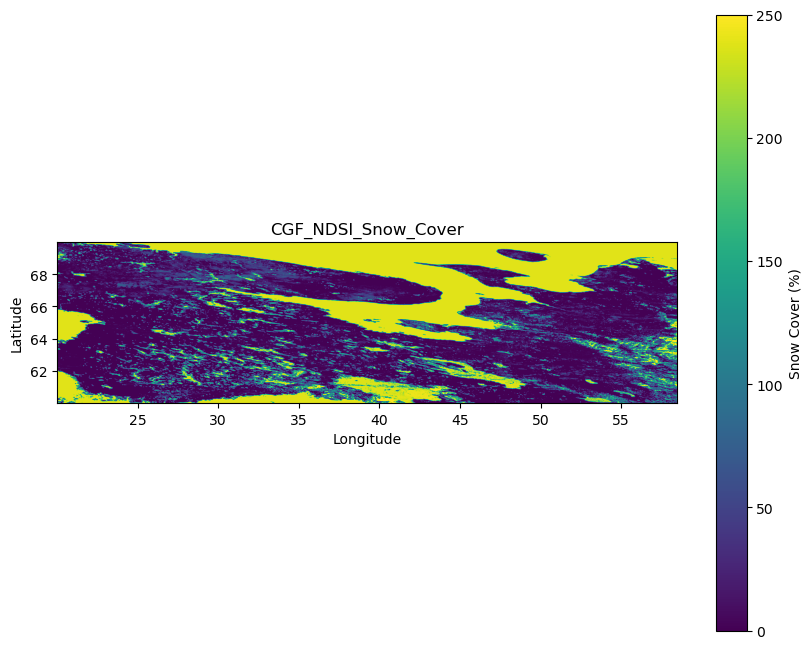

In [20]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt

# Open the newly created NetCDF file
netcdf_filename = 'CGF_NDSI_Snow_Cover.nc'
ncfile = Dataset(netcdf_filename, 'r')

# Read the data from the NetCDF file
snow_cover = ncfile.variables['CGF_NDSI_Snow_Cover'][:]
latitude = ncfile.variables['latitude'][:]
longitude = ncfile.variables['longitude'][:]

# Close the NetCDF file
ncfile.close()

# Print the shapes of the datasets
print('Snow Cover shape:', snow_cover.shape)
print('Latitude shape:', latitude.shape)
print('Longitude shape:', longitude.shape)

# Plot the snow cover data
plt.figure(figsize=(10, 8))
plt.imshow(snow_cover, extent=(longitude.min(), longitude.max(), latitude.min(), latitude.max()), cmap='viridis')
plt.colorbar(label='Snow Cover (%)')
plt.title('CGF_NDSI_Snow_Cover')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Testing with dataframe

In [7]:
from scripts.imports import *
import numpy as np
from pyhdf.SD import SD, SDC
import pyproj
from netCDF4 import Dataset


csv_path = 'snow_cam_details.csv'

excel_df = pd.read_csv(csv_path).drop(['Image','SCFG','MOD10A1','MYD10A1'], axis=1).dropna()
# excel_df
df = excel_df[excel_df['Camera'] == 'torgnon']
df

Camera        Date  FSC  Tree Snow  x_coord  y_coord  Certainty  \
391  torgnon  23/11/2018  1.0        1.0   7.5609  45.8238        1.0   
392  torgnon  30/11/2018  1.0        0.0   7.5609  45.8238        1.0   
393  torgnon  22/02/2019  1.0        0.0   7.5609  45.8238        1.0   
394  torgnon  28/02/2019  0.8        0.0   7.5609  45.8238        0.0   
395  torgnon  24/05/2019  0.0        0.0   7.5609  45.8238        1.0   
396  torgnon  30/05/2019  0.0        0.0   7.5609  45.8238        1.0   
397  torgnon  25/07/2019  0.0        0.0   7.5609  45.8238        1.0   
398  torgnon  22/08/2019  0.0        0.0   7.5609  45.8238        1.0   
399  torgnon  20/09/2019  0.0        0.0   7.5609  45.8238        1.0   
400  torgnon  27/09/2019  0.0        0.0   7.5609  45.8238        1.0   
401  torgnon  30/10/2019  0.0        0.0   7.5609  45.8238        1.0   
402  torgnon  21/11/2019  1.0        1.0   7.5609  45.8238        1.0   
403  torgnon  28/11/2019  1.0        0.0   7.5609  45.8238        1.0   
404  torgnon  20/02/2020  1.0        0.0   7.5609  45.8238        1.0   
405  torgnon  27/02/2020  1.0        0.0   7.5609  45.8238        1.0   
406  torgnon  21/05/2020  0.0        0.0   7.5609  45.8238        1.0   
407  torgnon  27/05/2020  0.0        0.0   7.5609  45.8238        1.0   
408  torgnon  20/08/2020  0.0        0.0   7.5609  45.8238        1.0   
409  torgnon  26/08/2020  0.0        0.0   7.5609  45.8238        1.0   
410  torgnon  19/11/2020  0.0        0.0   7.5609  45.8238        1.0   
411  torgnon  25/11/2020  0.0        0.0   7.5609  45.8238        1.0   
412  torgnon  24/12/2020  1.0        0.0   7.5609  45.8238        1.0   
413  torgnon  19/01/2021  1.0        0.0   7.5609  45.8238        1.0   
414  torgnon  17/02/2021  1.0        0.0   7.5609  45.8238        1.0   
415  torgnon  24/02/2021  1.0        0.0   7.5609  45.8238        1.0   
417  torgnon  26/05/2021  0.0        0.0   7.5609  45.8238        1.0   
418  torgnon  17/06/2021  0.0        0.0   7.5609  45.8238        1.0   
419  torgnon  18/08/2021  0.0        0.0   7.5609  45.8238        1.0   
420  torgnon  25/08/2021  0.0        0.0   7.5609  45.8238        1.0   
421  torgnon  17/11/2021  0.7        0.0   7.5609  45.8238        0.0   
422  torgnon  23/11/2021  0.0        0.0   7.5609  45.8238        0.0   
423  torgnon  16/02/2022  0.8        0.0   7.5609  45.8238        0.0   
424  torgnon  22/02/2022  1.0        0.0   7.5609  45.8238        1.0   
425  torgnon  25/04/2022  1.0        0.0   7.5609  45.8238        0.0   
426  torgnon  18/05/2022  0.0        0.0   7.5609  45.8238        1.0   
427  torgnon  24/05/2022  0.0        0.0   7.5609  45.8238        1.0   
428  torgnon  16/08/2022  0.0        0.0   7.5609  45.8238        1.0   
429  torgnon  23/08/2022  0.0        0.0   7.5609  45.8238        1.0   
430  torgnon  15/11/2022  1.0        1.0   7.5609  45.8238        1.0   
431  torgnon  22/11/2022  0.9        0.0   7.5609  45.8238        0.0   
432  torgnon  15/08/2023  0.0        0.0   7.5609  45.8238        1.0   
433  torgnon  21/08/2023  0.0        0.0   7.5609  45.8238        1.0   

     Altitude  
391    2091.0  
392    2091.0  
393    2091.0  
394    2091.0  
395    2091.0  
396    2091.0  
397    2091.0  
398    2091.0  
399    2091.0  
400    2091.0  
401    2091.0  
402    2091.0  
403    2091.0  
404    2091.0  
405    2091.0  
406    2091.0  
407    2091.0  
408    2091.0  
409    2091.0  
410    2091.0  
411    2091.0  
412    2091.0  
413    2091.0  
414    2091.0  
415    2091.0  
417    2091.0  
418    2091.0  
419    2091.0  
420    2091.0  
421    2091.0  
422    2091.0  
423    2091.0  
424    2091.0  
425    2091.0  
426    2091.0  
427    2091.0  
428    2091.0  
429    2091.0  
430    2091.0  
431    2091.0  
432    2091.0  
433    2091.0

In [9]:
# import os
# import numpy as np
# from pyhdf.SD import SD, SDC
# import pyproj
# import pandas as pd

# # Define the path to the CSV file containing camera details
# csv_path = 'snow_cam_details.csv'

# # Load DataFrame from CSV file, drop unnecessary columns, and filter by camera location
# excel_df = pd.read_csv(csv_path).drop('Image', axis=1).dropna()
# df = excel_df[excel_df['Camera'] == 'sodankyla_full']

# Define the directory containing the HDF files

import re

def extract_nums(text, point = 'ul'):
    # Define the regular expression pattern

    if point == 'ul':
        pattern = r'UpperLeftPointMtrs=\((.*?)\)'
    else:
        pattern = r'LowerRightMtrs=\((.*?)\)'
    
    # Search for the pattern in the text
    match = re.search(pattern, text)
    
    # Check if a match is found
    if match:
        # Extract the matched group (the characters between the parentheses)
        result = match.group(1)
        return parse_coordinates(result)
    else:
        return None, None

def parse_coordinates(coordinate_str):
    try:
        # Split the string by comma
        x_str, y_str = coordinate_str.split(',')
        
        # Convert the split strings to floats
        x = float(x_str)
        y = float(y_str)
        
        return x, y
    except ValueError:
        # Handle the case where conversion to float fails
        return None, None

start = 'MYD'
place='torgnon'
target_lat = 45.8238
target_lon = 7.5609

hdf_dir = f'../data_store/data/{start}10A1F_{place}/'

# Function to get day of year (DOY) from a date in 'dd/mm/yyyy' format
def get_day_of_year(date_str):
    date_obj = pd.to_datetime(date_str, format='%d/%m/%Y')
    return date_obj.strftime('%j')

# Function to find HDF file that matches the pattern MOD10A1F.AYYYYDDD*.hdf
def find_matching_hdf(year, day_of_year):
    # Construct the prefix and suffix to match
    prefix = f'{start}10A1F.A{year}{day_of_year}'
    suffix = '.hdf'
    
    # List all files in the directory
    files = os.listdir(hdf_dir)
    
    # Find the matching HDF file
    for file in files:
        if file.startswith(prefix) and file.endswith(suffix):
            return file
    
    return None

# Function to convert HDF file to latitude and longitude arrays
def hdf_to_latlon(hdf_path):
    # Open HDF file and extract necessary data
    hdf = SD(hdf_path, SDC.READ)
    dataset = hdf.select('CGF_NDSI_Snow_Cover')
    data = dataset[:]
    
    # Get grid parameters from the metadata
    ulx, uly = extract_nums(hdf.attributes()['StructMetadata.0'], point='ul')
    lrx, lry = extract_nums(hdf.attributes()['StructMetadata.0'], point='lr')
    nx, ny = data.shape
    
    # Define the spatial resolution
    xres = (lrx - ulx) / float(nx)
    yres = (uly - lry) / float(ny)
    
    # Define the grid
    x = np.linspace(ulx + xres / 2, lrx - xres / 2, nx)
    y = np.linspace(uly - yres / 2, lry + yres / 2, ny)
    xv, yv = np.meshgrid(x, y)
    
    # Convert the projection to lat/lon using pyproj
    proj = pyproj.Proj(proj='sinu', R=6371007.181, no_defs=True)
    lon, lat = proj(xv, yv, inverse=True)
    
    # Close HDF file
    hdf.end()
    
    return lat, lon, data

# Process each date in the filtered DataFrame
for index, row in df.iterrows():
    date_str = row['Date']
    day_of_year = get_day_of_year(date_str)
    year = date_str[-4:]  # Extract year from 'dd/mm/yyyy'
    
    # Find the matching HDF file
    hdf_filename = find_matching_hdf(year, day_of_year)
    
    if hdf_filename is None:
        print(f"HDF file for '{date_str}' not found.")
        continue
    
    hdf_path = os.path.join(hdf_dir, hdf_filename)
    
    # Convert HDF file to latitude, longitude, and data arrays
    latitude, longitude, snow_cover_data = hdf_to_latlon(hdf_path)
    
    # Find nearest indices for the given coordinates
    distances = np.sqrt((latitude - target_lat)**2 + (longitude - target_lon)**2)
    nearest_idx = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
    
    # Extract value at the nearest grid cell
    value = snow_cover_data[nearest_idx]
    
    # Print date and value
    # print(f"Date: {date_str}, Value at (-145.7514, 63.8811): {value}")
    print(value)


47
47
38
39
0
0
0
0
0
0
0
0
0
33
19
0
0
0
0
0
0
52
71
65
65
0
0
0
0
0
13
24
24
0
0
0
0
0
0
38
0
0


In [24]:
from scripts.FSC_dataframe_phoreal import *
df=pd.read_pickle('five_sites_0-05_0-005box.pkl')
df

camera        date          pvpg   y_strong    y_weak  \
0     sodankyla_full  12/01/2019 -5.859481e-02   0.418798       NaN   
1     sodankyla_full  12/01/2019 -1.107947e-01   0.693207  0.281346   
2     sodankyla_full  12/01/2019 -1.307186e+00   5.701271  1.996741   
3     sodankyla_full  12/01/2019 -2.447389e-01   1.431021       NaN   
4     sodankyla_full  12/01/2019 -6.999055e-02   0.656128       NaN   
...              ...         ...           ...        ...       ...   
2846         torgnon  21/08/2023 -5.881129e+00   1.735232       NaN   
2847         torgnon  21/08/2023 -7.604916e+01  13.056701       NaN   
2848         torgnon  21/08/2023 -3.200856e-17        NaN  0.409416   
2849         torgnon  21/08/2023 -1.648810e-21   0.897887       NaN   
2850         torgnon  21/08/2023 -9.166152e+00   1.373624       NaN   

          x_strong        x_weak  longitude   latitude  meanEgstrong  ...  \
0     7.147356e+00           NaN  26.718589  67.314333      3.432135  ...   
1     6.256682e+00  2.539343e+00  26.718589  67.319333      3.665784  ...   
2     4.361483e+00  1.527510e+00  26.718589  67.334333      4.188318  ...   
3     5.847133e+00           NaN  26.718589  67.339333      3.917523  ...   
4     9.374517e+00           NaN  26.731579  67.339333      3.940102  ...   
...            ...           ...        ...        ...           ...  ...   
2846  2.950508e-01           NaN   7.542963  45.806300      0.106401  ...   
2847  1.716876e-01           NaN   7.542963  45.811300      0.162791  ...   
2848           NaN  1.279081e+16   7.499913  45.816300           NaN  ...   
2849  5.445669e+20           NaN   7.507088  45.836300      0.049296  ...   
2850  1.498583e-01           NaN   7.507088  45.841300      0.083451  ...   

      meanEvstrong  meanEvweak       msw  night       asr  data_quantity  FSC  \
0         0.211951         NaN  1.000000    1.0  0.265230            5.0  1.0   
1         0.255316    0.145511  1.000000    1.0  0.246385            6.0  1.0   
2         0.487214    0.368884  1.000000    1.0  0.289655            6.0  1.0   
3         0.472251         NaN  1.000000    1.0  0.318363            2.0  1.0   
4         0.380358         NaN  1.000000    1.0  0.348368            2.0  1.0   
...            ...         ...       ...    ...       ...            ...  ...   
2846      1.109343         NaN  2.000000    0.0  0.071575            5.0  0.0   
2847      0.898253         NaN  2.000000    0.0  0.073169            3.0  0.0   
2848           NaN    0.409416  0.000000    0.0  0.055065            2.0  0.0   
2849      0.897887         NaN  0.000000    0.0  0.080508            2.0  0.0   
2850      0.608768         NaN  1.333333    0.0  0.079885            3.0  0.0   

      TreeSnow  JointSnow  Confidence  
0          0.0        1.0         1.0  
1          0.0        1.0         1.0  
2          0.0        1.0         1.0  
3          0.0        1.0         1.0  
4          0.0        1.0         1.0  
...        ...        ...         ...  
2846       0.0        0.0         1.0  
2847       0.0        0.0         1.0  
2848       0.0        0.0         1.0  
2849       0.0        0.0         1.0  
2850       0.0        0.0         1.0  

[2851 rows x 21 columns]

### Apply to excel

In [25]:
# import os
# import numpy as np
# from pyhdf.SD import SD, SDC
# import pyproj
# import pandas as pd

# # Define the path to the CSV file containing camera details
# csv_path = 'snow_cam_details.csv'

# # Load DataFrame from CSV file, drop unnecessary columns, and filter by camera location
# excel_df = pd.read_csv(csv_path).drop('Image', axis=1).dropna()
# df = excel_df[excel_df['Camera'] == 'sodankyla_full']

# Define the directory containing the HDF files

import re

def extract_nums(text, point = 'ul'):
    # Define the regular expression pattern

    if point == 'ul':
        pattern = r'UpperLeftPointMtrs=\((.*?)\)'
    else:
        pattern = r'LowerRightMtrs=\((.*?)\)'
    
    # Search for the pattern in the text
    match = re.search(pattern, text)
    
    # Check if a match is found
    if match:
        # Extract the matched group (the characters between the parentheses)
        result = match.group(1)
        return parse_coordinates(result)
    else:
        return None, None

def parse_coordinates(coordinate_str):
    try:
        # Split the string by comma
        x_str, y_str = coordinate_str.split(',')
        
        # Convert the split strings to floats
        x = float(x_str)
        y = float(y_str)
        
        return x, y
    except ValueError:
        # Handle the case where conversion to float fails
        return None, None

# start = 'MYD'
# place='torgnon'
# target_lat = 45.8238
# target_lon = 7.5609

# hdf_dir = f'../data_store/data/{start}10A1F_{place}/'

# Function to get day of year (DOY) from a date in 'dd/mm/yyyy' format
def get_day_of_year(date_str):
    date_obj = pd.to_datetime(date_str, format='%d/%m/%Y')
    return date_obj.strftime('%j')

# Function to find HDF file that matches the pattern MOD10A1F.AYYYYDDD*.hdf
def find_matching_hdf(year, day_of_year, start, hdf_dirf):
    # Construct the prefix and suffix to match
    prefix = f'{start}10A1F.A{year}{day_of_year}'
    suffix = '.hdf'
    
    # List all files in the directory
    files = os.listdir(hdf_dir)
    
    # Find the matching HDF file
    for file in files:
        if file.startswith(prefix) and file.endswith(suffix):
            return file
    
    return None

# Function to convert HDF file to latitude and longitude arrays
def hdf_to_latlon(hdf_path):
    # Open HDF file and extract necessary data
    hdf = SD(hdf_path, SDC.READ)
    dataset = hdf.select('CGF_NDSI_Snow_Cover')
    data = dataset[:]
    
    # Get grid parameters from the metadata
    ulx, uly = extract_nums(hdf.attributes()['StructMetadata.0'], point='ul')
    lrx, lry = extract_nums(hdf.attributes()['StructMetadata.0'], point='lr')
    nx, ny = data.shape
    
    # Define the spatial resolution
    xres = (lrx - ulx) / float(nx)
    yres = (uly - lry) / float(ny)
    
    # Define the grid
    x = np.linspace(ulx + xres / 2, lrx - xres / 2, nx)
    y = np.linspace(uly - yres / 2, lry + yres / 2, ny)
    xv, yv = np.meshgrid(x, y)
    
    # Convert the projection to lat/lon using pyproj
    proj = pyproj.Proj(proj='sinu', R=6371007.181, no_defs=True)
    lon, lat = proj(xv, yv, inverse=True)
    
    # Close HDF file
    hdf.end()
    
    return lat, lon, data

df['MOD10A1F'] = None
df['MYD10A1F'] = None

# Process each date in the filtered DataFrame
for index, row in df.iterrows():
    for start in ['MOD','MYD']:
        place = row['camera']
        # print(place)
    
        target_lat = row['latitude']
        target_lon = row['longitude']
    
        # print(target_lat)
        # print(target_lon)
        
        hdf_dir = f'../data_store/data/{start}10A1F_{place}/'
        
        date_str = row['date']
        day_of_year = get_day_of_year(date_str)
        year = date_str[-4:]  # Extract year from 'dd/mm/yyyy'
        
        # Find the matching HDF file
        hdf_filename = find_matching_hdf(year, day_of_year, start, hdf_dir)
        
        if hdf_filename is None:
            print(f"HDF file for '{date_str}' not found.")
            continue
        
        hdf_path = os.path.join(hdf_dir, hdf_filename)
        
        # Convert HDF file to latitude, longitude, and data arrays
        latitude, longitude, snow_cover_data = hdf_to_latlon(hdf_path)
        
        # Find nearest indices for the given coordinates
        distances = np.sqrt((latitude - target_lat)**2 + (longitude - target_lon)**2)
        nearest_idx = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
        
        # Extract value at the nearest grid cell
        value = snow_cover_data[nearest_idx]

        df.at[index,f'{start}10A1F'] = value
    # Print date and value
    # print(f"Date: {date_str}, Value at (-145.7514, 63.8811): {value}")
    # print(value)

df

KeyboardInterrupt: 

# SCFG

In [1]:
from scripts.imports import *

filename = '../data_store/data/MODIS_SCFG/2018/10/20181014-ESACCI-L3C_SNOW-SCFG-MODIS_TERRA-fv2.0.nc'

data = xr.open_dataset(filename)

data

<xarray.Dataset> Size: 5GB
Dimensions:      (lat: 18000, nv: 2, lon: 36000, time: 1)
Coordinates:
  * time         (time) datetime64[ns] 8B 2018-10-14
  * lat          (lat) float64 144kB -90.0 -89.98 -89.97 ... 89.98 89.98 90.0
  * lon          (lon) float64 288kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Dimensions without coordinates: nv
Data variables:
    lat_bnds     (lat, nv) float64 288kB ...
    lon_bnds     (lon, nv) float64 576kB ...
    scfg         (time, lat, lon) float32 3GB ...
    scfg_unc     (time, lat, lon) float32 3GB ...
    spatial_ref  int32 4B ...
Attributes: (12/42)
    title:                      ESA CCI snow on ground product level L3C dail...
    institution:                ENVEO IT GmbH
    source:                     TERRA MODIS, Collection 6.1: calibrated radia...
    history:                    2021-12-10: ESA snow_cci processing line SCFG...
    references:                 http://snow-cci.enveo.at/
    tracking_id:                d147fe93-7b1f-46d4-9a28-85749a5898b2
    ...                         ...
    license:                    ESA CCI Data Policy: free and open access
    platform:                   TERRA
    sensor:                     MODIS
    spatial_resolution:         0.01 degree
    key_variables:              scfg
    doi:                        10.5285/8847a05eeda646a29da58b42bdf2a87c